In [1]:
#Importamos las librerias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *
import missingno as msno
from sklearn.preprocessing import LabelEncoder


## Obtener información

La información utilizada en este proyecto, fue conseguida de la base de datos histórica del servicio de orientación del CBT No.2 Lic. Carlos Pichardo, Tecámac y es un archivo csv.

1. habitos_estudio.csv, este archivo contiene la información mostrada en df.columns


In [2]:
#Obtenemos el dataset
df= pd.read_csv("habitos_estudio.csv")

In [3]:
#Obtenemos las columnas del dataset
df.columns

Index(['GRUPO', 'CARRERA', 'AÑO', 'APELLIDO PATERNO', 'APELLIDO MATERNO',
       'NOMBRE(S)', 'LUGAR DE NACIMIENTO ', 'FECHA DE NACIMIENTO', 'EDAD',
       'SEXO', 'ESTATURA', 'PESO',
       'IMC (ÍNDICE DE MASA CORPORAL) OBTEN EL DATO EN EL SIGUIENTE LINK  https://www.cdc.gov/healthyweight/spanish/bmi/calculator.html',
       'ESTADO CIVIL', '¿TIENES HIJOS?', 'MUNICIPIO ', 'SITUACIÓN DEL PADRE',
       '¿DÓNDE RADICA ACTUALMENTE TU PAPÁ?',
       'ÚLTIMO GRADO DE ESTUDIOS CONCLUIDOS ', 'OCUPACIÓN ',
       '¿LA CONDICIÓN DE SALUD DE TU PAPÁ PUEDE INFLUIR EN TU ASISTENCIA A LA ESCUELA?',
       'SI TU RESPUESTA ES SI, EXPLICA ¿POR QUÉ?', 'SITUACIÓN DE LA MADRE',
       '¿DÓNDE RADICA ACTUALMENTE TU MAMÁ?', 'ULTIMO GRADO DE ESTUDIOS',
       'OCUPACIÓN',
       '¿LA CONDICIÓN DE SALUD DE TU MAMÁ PUEDE INFLUIR EN TU ASISTENCIA A LA ESCUELA?',
       'SI TU RESPUESTA ES SI, EXPLICA ¿POR QUÉ?.1',
       '¿CUANTOS HERMANOS TIENES?', '¿QUE LUGAR OCUPAS?',
       'ESTADO CIVIL DE LOS PADRES',

In [4]:
#Renombramos las columnas
df.columns=['Grupo', 'Carrera', "Año", "Apellido_p","Apellido_m","Nombres","Lugar_de_nacimiento","Fecha_de_nacimiento","Edad"
           ,"Genero","Estatura", "Peso","IMC","Estado_civil","Hijos","Municipio" ,"Situación_actual_p","Donde_radica_p"
            ,"Grado_estudios_p","Ocupacion_p","Condicion_p","Explica_porque_p","Situacion_m","Residecia_m","Grado_estudios_m"
            ,"Ocupacion_m","Condicion_m","Por_que_m","Número_hermanos","Lugar_ocupa","Estado_civil_padres","Con_quien_vives"
            ,"Relacion_padres","Dificultades_comunicacion","Trabajas","Razones","Ingreso_mensual","Quienes_aportan_ingreso"
            ,"Cuantos_dependen_ingreso","Beca","Problema_de_salud","Cual","Condicion_visual","Condicion_psicologica"
            ,"Discapacidad","Mano_escribes","Servicio_medico","Promedio_secundaria","Aciertos_comipems","Opcion_comipems"
            ,"Actividades_extracurriculares","Equipo_de_computo","Honey_alonso","Canal_aprendizaje","Inteligencias_multiples"
            ,"Funcionamiento_familiar","Autoestima","Habitos_de_estudio"]

In [5]:
#Eliminamos las columnas que no son necesarias para este proyecto
habitos=df.drop(["Apellido_p","Apellido_m","Nombres","Año","Estado_civil","Hijos","Número_hermanos","Lugar_ocupa","Lugar_de_nacimiento"
                  ,"Fecha_de_nacimiento", "Estatura","Peso", "IMC","Situación_actual_p"
                  , "Donde_radica_p", "Condicion_p","Explica_porque_p", "Situacion_m", "Residecia_m", "Condicion_m"
                 ,"Por_que_m", "Relacion_padres", "Dificultades_comunicacion", "Razones", "Discapacidad","Cual"
                  , "Servicio_medico","Estado_civil_padres", "Con_quien_vives","Trabajas", "Quienes_aportan_ingreso"
                  ,"Cuantos_dependen_ingreso","Problema_de_salud","Condicion_visual","Condicion_psicologica","Mano_escribes"
                  ,"Actividades_extracurriculares", "Beca", "Inteligencias_multiples"], axis=1)

In [6]:
#Mostramos las primeras 5 columnas del dataset
habitos.head(5)

,Grupo,Carrera,Edad,Genero,Municipio,Grado_estudios_p,Ocupacion_p,Grado_estudios_m,Ocupacion_m,Ingreso_mensual,Promedio_secundaria,Aciertos_comipems,Opcion_comipems,Equipo_de_computo,Honey_alonso,Canal_aprendizaje,Funcionamiento_familiar,Autoestima,Habitos_de_estudio
0,105,DAC,14 AÑOS,MASCULINO,ECATEPEC,SECUNDARIA,NEGOCIO PROPIO,SECUNDARIA,SE DEDICA AL HOGAR,"DE $10,000 A $14,999",7.4,71 A 90,SEGUNDA,"EQUIPO DE COMPUTO, IMPRESORA E INTERNET",ESTILO PRAGMATICO,NaN,FUNCIONAL,NaN,NaN
1,105,DAC,15 AÑOS,MASCULINO,TEOTIHUACÁN,SECUNDARIA,NEGOCIO PROPIO,SECUNDARIA,NEGOCIO PROPIO,DE $5000 A $6999,7.2,71 A 90,PRIMERA,SOLO INTERNET,ESTILO REFLEXIVO,NaN,DISFUNCIONAL,NaN,NaN
2,105,DAC,14 AÑOS,MASCULINO,ZUMPANGO,SECUNDARIA,NaN,SECUNDARIA,EMPLEADA,DE $3000 A $4999,7.9,71 A 90,TERCERA,EQUIPO DE COMPUTO E INTERNET,ESTILO REFLEXIVO,NaN,DISFUNCIONAL,NaN,NaN
3,105,DAC,14 AÑOS,FEMENINO,TECÁMAC,CARRERA TÉCNICA,"OFICIO (CARPINTERO, CAMPESINO, OBRERO, HERRERO...",CARRERA TECNICA,"OFICIO (COSTURERA, OBRERA, COCINERA, ESTILISTA...","DE $10,000 A $14,999",9.4,71 A 90,SEGUNDA,EQUIPO DE COMPUTO E INTERNET,ESTILO REFLEXIVO,NaN,FUNCIONAL,NaN,NaN
4,105,DAC,14 AÑOS,FEMENINO,TECÁMAC,PREPARATORIA O BACHILLERATO,"OFICIO (CARPINTERO, CAMPESINO, OBRERO, HERRERO...",PREPARATORIA O BACHILLERATO,EMPLEADA,DE $1000 A $2999,9.4,91 A 120,SEGUNDA,SOLO INTERNET,ESTILO ACTIVO,NaN,FUNCIONAL,NaN,NaN


In [7]:
#Mostramos la información del dataset
habitos.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Grupo                    1040 non-null   int64 
 1   Carrera                  1040 non-null   object
 2   Edad                     1040 non-null   object
 3   Genero                   1040 non-null   object
 4   Municipio                1040 non-null   object
 5   Grado_estudios_p         1039 non-null   object
 6   Ocupacion_p              1034 non-null   object
 7   Grado_estudios_m         1039 non-null   object
 8   Ocupacion_m              1038 non-null   object
 9   Ingreso_mensual          1039 non-null   object
 10  Promedio_secundaria      891 non-null    object
 11  Aciertos_comipems        890 non-null    object
 12  Opcion_comipems          886 non-null    object
 13  Equipo_de_computo        891 non-null    object
 14  Honey_alonso             659 non-null   

## Datos nulos

<AxesSubplot:>

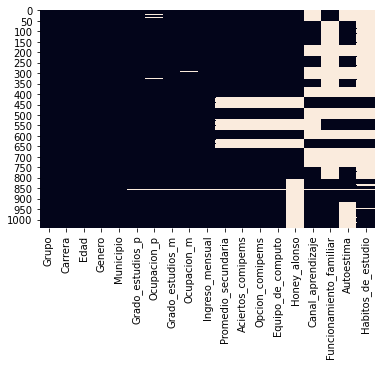

In [8]:
# Mostramos los datos nulos
sns.heatmap(habitos.isnull(),cbar=False)

In [9]:
#Número de datos nulos y su porcentaje en las columnas
porcentaje_nulos= habitos.isnull().mean().round(4)*100
pd.merge(habitos.isnull().sum().reset_index(),porcentaje_nulos.reset_index(), how="inner", on="index", suffixes=("_Valores Nulos", "_Porcentaje de valores nulos"))

,index,0_Valores Nulos,0_Porcentaje de valores nulos
0,Grupo,0,0.00
1,Carrera,0,0.00
2,Edad,0,0.00
3,Genero,0,0.00
4,Municipio,0,0.00
5,Grado_estudios_p,1,0.10
6,Ocupacion_p,6,0.58
7,Grado_estudios_m,1,0.10
8,Ocupacion_m,2,0.19
9,Ingreso_mensual,1,0.10


Dentro de los datos faltantes con un menor porcentaje son: Grado_estudios_m 0.096%, Ocupación_p 5.6%, Grado_estudios_m 0.096%
Ocupación_m 0.192% Ingreso_mensual 0.096% por lo que dichos datos fueron eliminados, para facilitar su analisis.
Las columnas que resultan de gran importancia para este estudio son Promedio_secundaria, Inteligencias_multiples, Aciertos comipems, Honey Alonso, Canal_de aprendizaje, habitos de estudio y las columnas que resultan importantes en un segundo plano son: Equipo_de_computo, Oción_comipems, Autoestima y funcionamiento familiar. Por lo que será necesario determinar si estas variables resultan significativas para la predicción del rendimiento escolar.
En el caso de las variables de primer orden por ser de gran importancia, se autorrellenaran los valores nulos con el promedio obtenido.

In [10]:
#Eliminamos los datos nulos en el dataset que no resultan relevantes
habitos.drop(habitos[habitos.Ingreso_mensual.isnull()].index,inplace=True)
habitos.drop(habitos[habitos.Grado_estudios_m.isnull()].index,inplace=True)
habitos.drop(habitos[habitos.Grado_estudios_p.isnull()].index,inplace=True)
habitos.drop(habitos[habitos.Ocupacion_m.isnull()].index,inplace=True)
habitos.shape

(1038, 19)

In [11]:
#Mostramos nuevamente la información del dataset
habitos.isna().sum().sort_values()

Grupo                        0
Ocupacion_m                  0
Grado_estudios_m             0
Grado_estudios_p             0
Ingreso_mensual              0
Genero                       0
Edad                         0
Carrera                      0
Municipio                    0
Ocupacion_p                  5
Promedio_secundaria        148
Equipo_de_computo          148
Aciertos_comipems          149
Opcion_comipems            153
Honey_alonso               380
Canal_aprendizaje          449
Autoestima                 517
Funcionamiento_familiar    604
Habitos_de_estudio         681
dtype: int64

<AxesSubplot:>

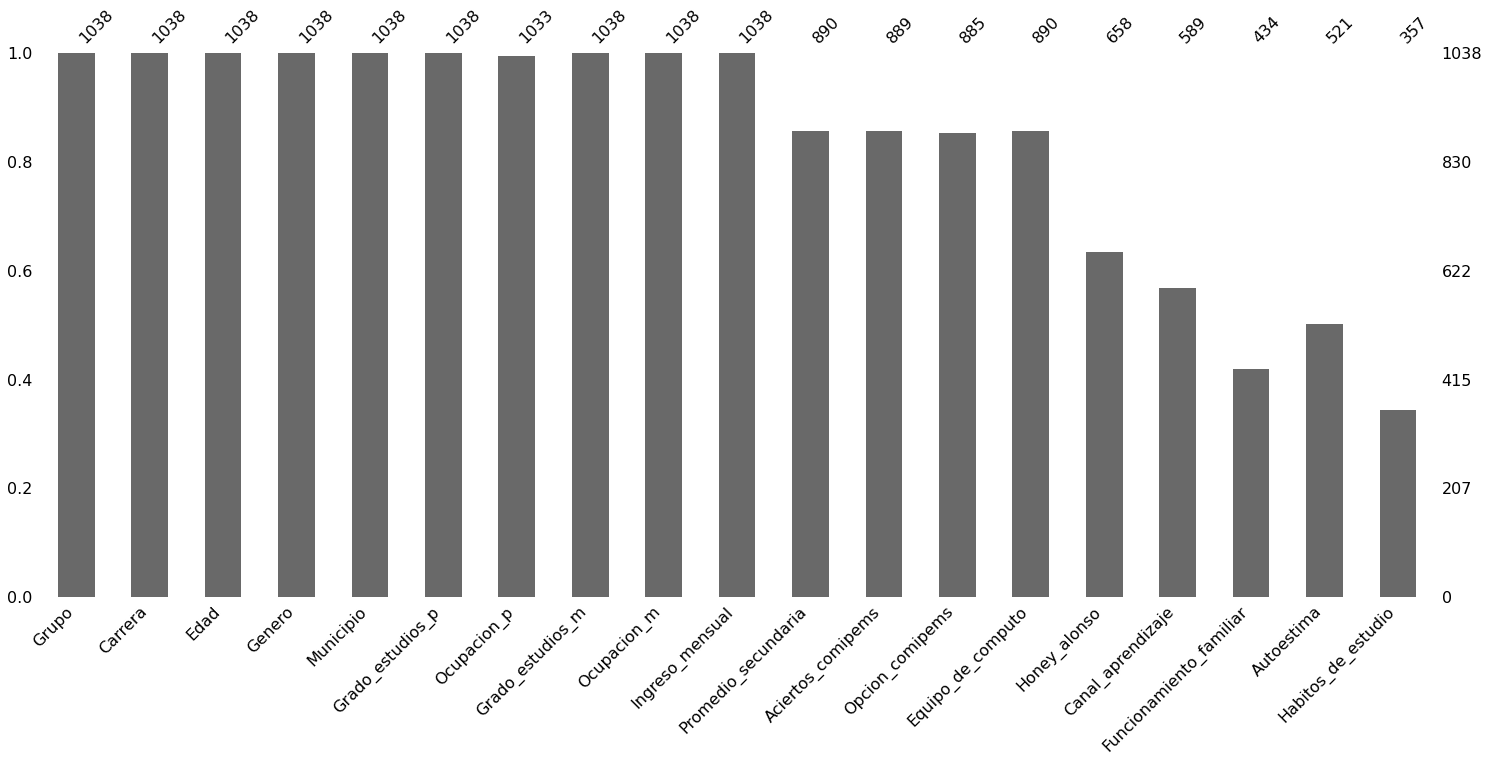

In [12]:
msno.bar(habitos)

<AxesSubplot:>

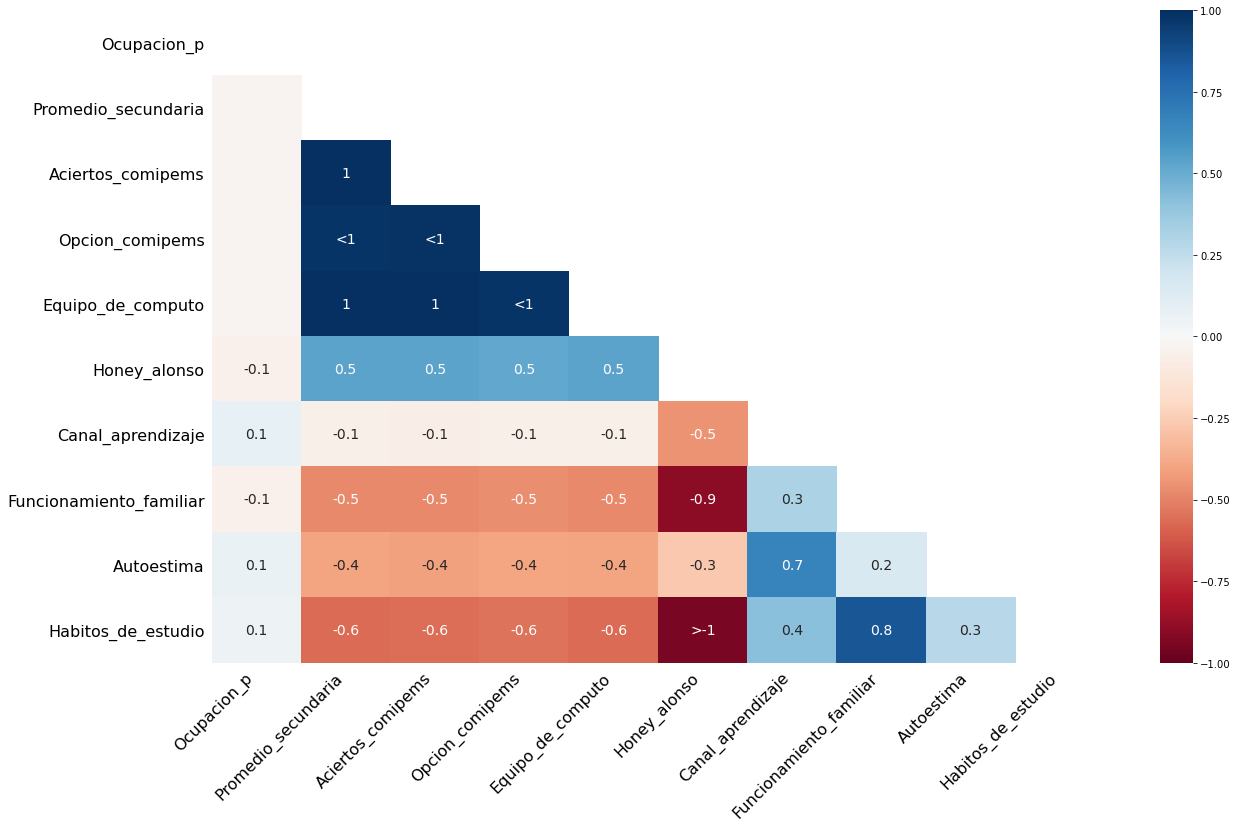

In [13]:
# Resulta más intuitivo ver la matriz de correlación a través de un gráfico -heatmap 
#Definimos la correlación
msno.heatmap(habitos)


In [14]:
habitos["Grupo"].unique()

array([105, 106, 107, 108, 109, 110, 111, 112, 113], dtype=int64)

In [15]:
freq_grupo = (habitos.groupby("Grupo").agg(frecuency=("Grupo", "count")).reset_index())
freq_grupo

,Grupo,frecuency
0,105,214
1,106,173
2,107,165
3,108,153
4,109,104
5,110,53
6,111,41
7,112,87
8,113,48


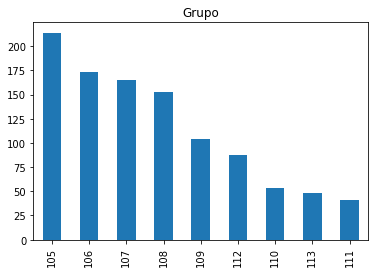

In [16]:
plot=habitos["Grupo"].value_counts().plot(kind="bar",title="Grupo")

In [17]:
habitos["Carrera"].unique()

array(['DAC', 'IF', 'ID'], dtype=object)

In [18]:
freq_carrera = (habitos.groupby("Carrera").agg(frecuency=("Carrera", "count")).reset_index())
freq_carrera

,Carrera,frecuency
0,DAC,387
1,ID,176
2,IF,475


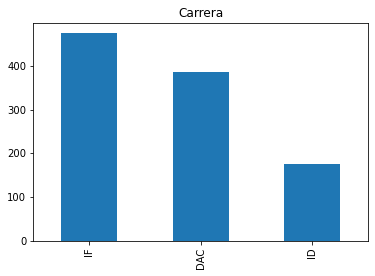

In [19]:
plot=habitos["Carrera"].value_counts().plot(kind="bar",title="Carrera")

In [20]:
habitos["Edad"].unique()

array(['14 AÑOS', '15 AÑOS', '17 AÑOS', '16 AÑOS', '19 AÑOS', '13 AÑOS',
       '15 AÑOS ', '14 AÑOS.'], dtype=object)

In [21]:
habitos["Edad"] = habitos["Edad"].str.extract("(\d+)", expand=False) #estoy diciendole al programa que a la columna edad le quite todo lo que no sea numérico
print(habitos["Edad"])

0       14
1       15
2       14
3       14
4       14
        ..
1035    15
1036    16
1037    16
1038    15
1039    16
Name: Edad, Length: 1038, dtype: object


In [22]:
habitos["Edad"].unique()

array(['14', '15', '17', '16', '19', '13'], dtype=object)

In [23]:
freq_edad = (habitos.groupby("Edad").agg(frecuency=("Edad", "count")).reset_index())
freq_edad

,Edad,frecuency
0,13,56
1,14,371
2,15,558
3,16,43
4,17,9
5,19,1


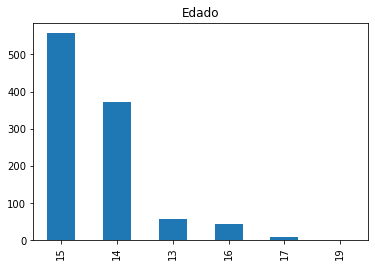

In [24]:
plot=habitos["Edad"].value_counts().plot(kind="bar",title="Edado")

In [25]:
habitos["Genero"].unique()

array(['MASCULINO', 'FEMENINO'], dtype=object)

In [26]:
freq_genero = (habitos.groupby("Genero").agg(frecuency=("Genero", "count")).reset_index())
freq_genero

,Genero,frecuency
0,FEMENINO,453
1,MASCULINO,585


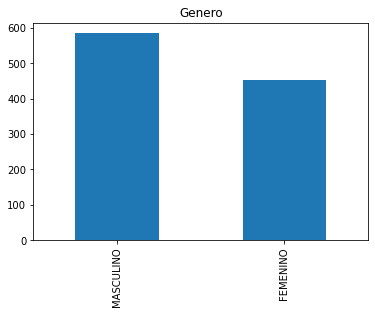

In [27]:
plot=habitos["Genero"].value_counts().plot(kind="bar",title="Genero")

In [28]:
habitos["Municipio"].unique()

array(['ECATEPEC', 'TEOTIHUACÁN', 'ZUMPANGO', 'TECÁMAC', 'TEMASCALAPA',
       'ACOLMAN', 'HUEYPOXTLA', 'TIZAYUCA', 'OTRO', 'TEOTIHUACAN',
       'NEXTLALPAN', 'Teotihuacán', 'CIUDAD DE MÉXICO', 'Otumba',
       'TEZOYUCA', 'Santa Maria Tonanitla', 'SAN MARTIN DE LAS PIRAMIDES',
       'COACALCO', 'Hueypoxtla'], dtype=object)

In [29]:
habitos["Municipio"]=habitos["Municipio"].replace(["TEOTIHUACÁN","Teotihuacán", "SAN MARTIN DE LAS PIRAMIDES"],"TEOTIHUACAN")
habitos["Municipio"]=habitos["Municipio"].replace(["Santa Maria Tonanitla", "COACALCO", "NEXTLALPAN", "OTUMBA", "TEZOYUCA", "ACOLMAN", "CIUDAD DE MÉXICO"],"OTRO")
habitos["Municipio"]=habitos["Municipio"].str.upper()

In [30]:
habitos["Municipio"].unique()

array(['ECATEPEC', 'TEOTIHUACAN', 'ZUMPANGO', 'TECÁMAC', 'TEMASCALAPA',
       'OTRO', 'HUEYPOXTLA', 'TIZAYUCA', 'OTUMBA'], dtype=object)

In [31]:
freq_municipio = (habitos.groupby("Municipio").agg(frecuency=("Municipio", "count")).reset_index())
freq_municipio

,Municipio,frecuency
0,ECATEPEC,47
1,HUEYPOXTLA,28
2,OTRO,21
3,OTUMBA,1
4,TECÁMAC,654
5,TEMASCALAPA,31
6,TEOTIHUACAN,12
7,TIZAYUCA,26
8,ZUMPANGO,218


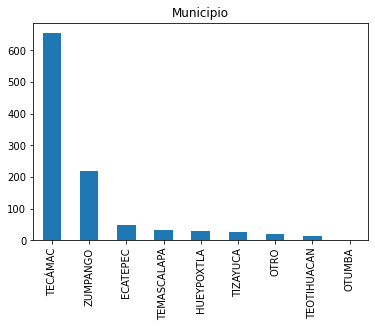

In [32]:
plot=habitos["Municipio"].value_counts().plot(kind="bar",title="Municipio")

In [33]:
habitos["Grado_estudios_p"].unique()

array(['SECUNDARIA', 'CARRERA TÉCNICA', 'PREPARATORIA O BACHILLERATO',
       'MAESTRIA', 'LICENCIATURA, INGENIERÍA O ESCUELA NORMAL',
       'SIN ESTUDIOS', 'PRIMARIA', 'LICENCIATURA, INGENIERÍA O NORMAL',
       'PREPARATORIA O BACHILLERATO INCOMPLETO', 'SECUNDARIA INCOMPLETA',
       'SUPERIOR INCOMPLETA', 'MAESTRÍA', 'DOCTORADO',
       'PRIMARIA INCOMPLETA', 'CARRERA TÉCNICA INCOMPLETA',
       'ESTUDIOS SUPERIORES INCOMPLETOS'], dtype=object)

In [34]:
habitos["Grado_estudios_p"]=habitos["Grado_estudios_p"].replace(["MAESTRÍA"],"MAESTRIA")
habitos["Grado_estudios_p"]=habitos["Grado_estudios_p"].replace(["LICENCIATURA, INGENIERÍA O ESCUELA NORMAL", "LICENCIATURA, INGENIERÍA O NORMAL"],"LICENCIATURA, INGENIERIA O NORMAL")

In [35]:
habitos["Grado_estudios_p"].unique()

array(['SECUNDARIA', 'CARRERA TÉCNICA', 'PREPARATORIA O BACHILLERATO',
       'MAESTRIA', 'LICENCIATURA, INGENIERIA O NORMAL', 'SIN ESTUDIOS',
       'PRIMARIA', 'PREPARATORIA O BACHILLERATO INCOMPLETO',
       'SECUNDARIA INCOMPLETA', 'SUPERIOR INCOMPLETA', 'DOCTORADO',
       'PRIMARIA INCOMPLETA', 'CARRERA TÉCNICA INCOMPLETA',
       'ESTUDIOS SUPERIORES INCOMPLETOS'], dtype=object)

In [36]:
freq_estudios_p = (habitos.groupby("Grado_estudios_p").agg(frecuency=("Grado_estudios_p", "count")).reset_index())
freq_estudios_p

,Grado_estudios_p,frecuency
0,CARRERA TÉCNICA,81
1,CARRERA TÉCNICA INCOMPLETA,4
2,DOCTORADO,5
3,ESTUDIOS SUPERIORES INCOMPLETOS,3
4,"LICENCIATURA, INGENIERIA O NORMAL",98
5,MAESTRIA,18
6,PREPARATORIA O BACHILLERATO,221
7,PREPARATORIA O BACHILLERATO INCOMPLETO,52
8,PRIMARIA,100
9,PRIMARIA INCOMPLETA,15


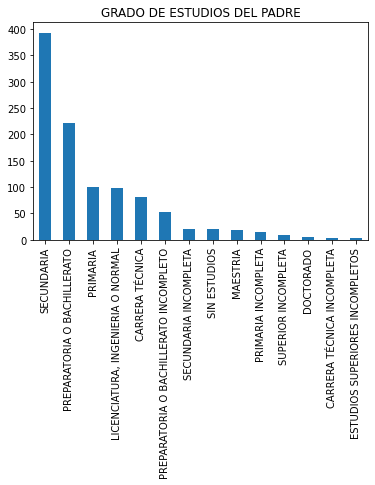

In [37]:
plot=habitos["Grado_estudios_p"].value_counts().plot(kind="bar",title="GRADO DE ESTUDIOS DEL PADRE")

In [38]:
habitos["Grado_estudios_m"].unique()

array(['SECUNDARIA', 'CARRERA TECNICA', 'PREPARATORIA O BACHILLERATO',
       'LICENCIATURA, INGENIERÍA O ESCUELA NORMAL', 'PRIMARIA',
       'MAESTRIA', 'SECUNDARIA INCOMPLETA',
       'PREPARATORIA O BACHILLERATO INCOMPLETO',
       'LICENCIATURA, INGENIERÍA O NORMAL', 'PRIMARIA INCOMPLETA',
       'SUPERIOR INCOMPLETA', 'CARRERA TÉCNICA INCOMPLETA',
       'SIN ESTUDIOS', 'CARRERA TÉCNICA', 'MAESTRÍA'], dtype=object)

In [39]:
habitos["Grado_estudios_m"]=habitos["Grado_estudios_m"].replace(["CARRERA TÉCNICA"],"CARRERA TECNICA")
habitos["Grado_estudios_m"]=habitos["Grado_estudios_m"].replace(["LICENCIATURA, INGENIERÍA O ESCUELA NORMAL", "LICENCIATURA, INGENIERÍA O NORMAL"],"LICENCIATURA, INGENIERIA O NORMAL")
habitos["Grado_estudios_m"]=habitos["Grado_estudios_m"].replace(["MAESTRÍA"],"MAESTRIA")

In [40]:
freq_estudios_m = (habitos.groupby("Grado_estudios_m").agg(frecuency=("Grado_estudios_m", "count")).reset_index())
freq_estudios_m

,Grado_estudios_m,frecuency
0,CARRERA TECNICA,147
1,CARRERA TÉCNICA INCOMPLETA,3
2,"LICENCIATURA, INGENIERIA O NORMAL",69
3,MAESTRIA,14
4,PREPARATORIA O BACHILLERATO,188
5,PREPARATORIA O BACHILLERATO INCOMPLETO,52
6,PRIMARIA,100
7,PRIMARIA INCOMPLETA,13
8,SECUNDARIA,426
9,SECUNDARIA INCOMPLETA,17


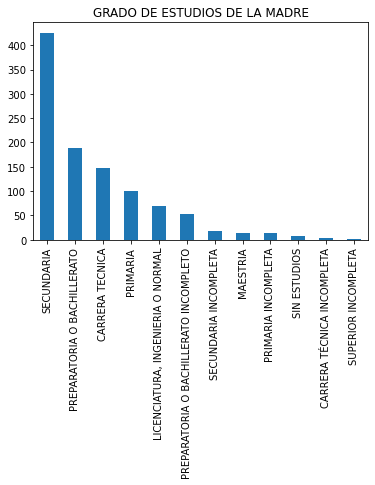

In [41]:
plot=habitos["Grado_estudios_m"].value_counts().plot(kind="bar",title="GRADO DE ESTUDIOS DE LA MADRE")

In [42]:
habitos["Ocupacion_p"].unique()

array(['NEGOCIO PROPIO', nan,
       'OFICIO (CARPINTERO, CAMPESINO, OBRERO, HERRERO, CARPINTERO, ALBAÑIL, ENTRE OTROS)',
       'EMPLEADO', 'COMERCIO INFORMAL', 'POLICIA',
       'OTRO(ASESOR INMOBILIARIO)', 'JUBILADO', 'SERVIDOR PÚBLICO',
       'PROFESIONISTA INDEPENDIENTE', 'OTRO(TAXISTA)', 'MILITAR',
       'DESEMPLEADO', 'OTRO', 'OBRERO', 'OFICIO', 'COMERCIANTE',
       'SERVIDOR PÚBLICO, OTRO', 'DOCENTE', 'OFICIO, OTRO',
       'OTRO (Chofér)', 'SE DEDICA AL HOGAR',
       'OTRO (PRIVADO DE LA LIBERTAD)', 'CAMPESINO', 'OTRO (Chef)',
       'OTRO (Taquero)', 'OTRO (Chofer Mensajero)',
       'OTRO (CHOFER DE AUTOBUS)', 'OTRO (TAXISTA)',
       'NEGOCIO PROPIO, PROFESIONISTA INDEPENDIENTE', 'Taxista',
       'Técnico en urgencias médicas ', 'Maneja un trailer',
       'LO DESCONOZCO', 'Pensionado', 'Está muerto ',
       'TECNICO EN SISTEMAS DE SEGURIDAD', 'FINADO', 'CHOFER',
       'OPERADOR DE TRASPORTE PUBLICO', 'OBRERO, OTRO',
       'Conductor de autobús', 'Mecánico en línea 

In [43]:
habitos["Ocupacion_p"]=habitos["Ocupacion_p"].replace(["ALBAÑIL", "CAMPECINO", "CAMPESINO", "HERRERO", "CARPINTERO",
                                                       "ALBAÑIL", "tablarroquero", "panadero", "OFICIO (CARPINTERO, CAMPESINO, OBRERO, HERRERO, CARPINTERO, ALBAÑIL, ENTRE OTROS)",
                                                      "OFICO", "OFICIO, OTRO", "albañil", "Panadero", "ELECTRICISTA", "Mecánico en línea blanca ",
                                                      "MECANICO", "Electricista", "TORNERO ", "ROTULISTA ", "MONTACARGISTA",
                                                      "ELECTRICISTA ", 'CAMPESINO', 'CONSTRUCTOR', 'ELECTRONICO', 'COMERCIANTE'],"OFICIO")

habitos["Ocupacion_p"]=habitos["Ocupacion_p"].replace(["POLICIA", "DOCENTE", "SERVIDOR PÚBLICO", "MILITAR", "SERVIDOR PÚBLICO, OTRO",
                                                      "SEGURIDAD PUBLICA", "Técnico en urgencias médicas ", "Enfermera", "Paramedico"],"SERVIDOR PUBLICO")

habitos["Ocupacion_p"]=habitos["Ocupacion_p"].replace(["OTRO(TAXISTA)", "Chofer", "OTRO (Chef)",
                                                      "OTRO(ASESOR INMOBILIARIO)", "OTRO (PRIVADO DE LA LIBERTAD)", "OTRO (Chofer Mensajero)",
                                                      "OTRO (TAXISTA)", "OTRO (CHOFER DE AUTOBUS)", "Taxista", "Maneja un trailer",
                                                      "TAXISTA", "Conductor de autobús", "Chofer", "Chofer de empresa", "CHOFER", "CHÓFER"
                                                      "Cocinero", "Operador", "OPREDADOR DE TRACTOCAMION"],"OTRO")

habitos["Ocupacion_p"]=habitos["Ocupacion_p"].replace(["OTRO (Chofér)", "OTRO (Taquero)", "CHEF", "CHOFER ", "CONDUCTOR DE TURISMO ",
                                                      "VARIOS TRABAJOS", "TRAILERO", "Chofer ", "Cocinero", "Operador de tráiler ",
                                                      "OPERADOR DE TRASPORTE PUBLICO", "Trabaja en cuidar un Walmart", "Pre-venta",
                                                      "DESPACHADOR DE GASOLINA", "operadaor de tractocamion", "ayudante de macanico",
                                                      "HOTELERO", "OPERADOR DE TRAILER ", "OPERADOR DE TRACTOCAMION", 'EVENTOS SOCIALES ( ALQUILADORA)',
                                                      'Instructor de gimnacio', 'COBRADOR', 'NEGOCIO PROPIO, PROFESIONISTA INDEPENDIENTE',
                                                      'COMERCIO INFORMAL'],"OTRO")

habitos["Ocupacion_p"]=habitos["Ocupacion_p"].replace(["Pensionado"],"JUBILADO")

habitos["Ocupacion_p"]=habitos["Ocupacion_p"].replace(["Está muerto "],"FINADO")

habitos["Ocupacion_p"]=habitos["Ocupacion_p"].replace(["empleado ", "empleado", "Empleado", "AUXILIAR CONTABLE", "EMPLEADA", "Asesor telefonico ",
                                                      "TECNICO EN SISTEMAS DE SEGURIDAD", 'GEFE DE SEGURIDAD', 'Supervisor ', 'ALMACENISTA ',
                                                      "OBRERO, OTRO",'EMPLEADO FEDERAL', 'GUARDIA', 'OBRERO'],"EMPLEADO")

habitos["Ocupacion_p"]=habitos["Ocupacion_p"].replace(["NO SE", "NO SE SABE", "LO DESCONOZCO", "Desconozco", "ninguna", "NO SE SABE."],"DESCONOCIDO")

habitos["Ocupacion_p"]=habitos["Ocupacion_p"].replace(["SE DEDICA AL HOGAR"],"HOGAR")

habitos["Ocupacion_p"]=habitos["Ocupacion_p"].replace(["CONSULTOR EN SISTEMAS COMPUTACIONALES ", "Contador", "TRABAJA POR SU CUENTA ", "CONTADOR",
                                                      'diseñador '],"PROFESIONISTA INDEPENDIENTE")

In [44]:
habitos["Ocupacion_p"].unique()

array(['NEGOCIO PROPIO', nan, 'OFICIO', 'EMPLEADO', 'OTRO',
       'SERVIDOR PUBLICO', 'JUBILADO', 'PROFESIONISTA INDEPENDIENTE',
       'DESEMPLEADO', 'HOGAR', 'DESCONOCIDO', 'FINADO', 'CHÓFER'],
      dtype=object)

In [45]:
freq_ocupacion_p = (habitos.groupby("Ocupacion_p").agg(frecuency=("Ocupacion_p", "count")).reset_index())
freq_ocupacion_p

,Ocupacion_p,frecuency
0,CHÓFER,1
1,DESCONOCIDO,7
2,DESEMPLEADO,33
3,EMPLEADO,314
4,FINADO,2
5,HOGAR,3
6,JUBILADO,11
7,NEGOCIO PROPIO,71
8,OFICIO,180
9,OTRO,190


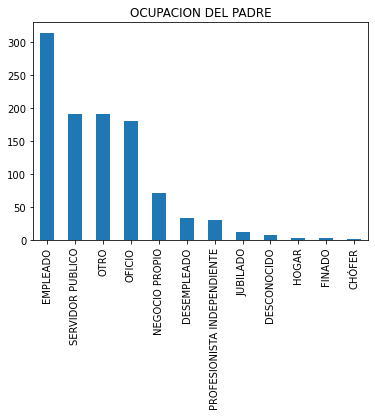

In [46]:
plot=habitos["Ocupacion_p"].value_counts().plot(kind="bar",title="OCUPACION DEL PADRE")

In [47]:
habitos["Ocupacion_m"].unique()

array(['SE DEDICA AL HOGAR', 'NEGOCIO PROPIO', 'EMPLEADA',
       'OFICIO (COSTURERA, OBRERA, COCINERA, ESTILISTA, EMPLEADA DOMÉSTICA, ENTRE OTROS)',
       'DOCENTE', 'COMERCIO INFORMAL', 'OTRO', 'MILITAR', 'POLICIA',
       'HOGAR', 'COMERCIANTE', 'OBRERA', 'OFICIO', 'OFICIO, OTRO',
       'DESEMPLEADA', 'COSTURERA, COMERCIANTE, HOGAR', 'OTRO (Cocinera)',
       'SERVIDOR PÙBLICO', 'OTRO (Trabaja de limpieza)',
       'EMPLEADA, OFICIO', 'HOGAR, OTRO', 'EMPLEADA, HOGAR',
       'NEGOCIO PROPIO, HOGAR', 'COSTURERA', 'OBRERA, HOGAR', 'JUBILADA',
       'Técnico en urgencias médicas ', 'PROFESIONISTA INDEPENDIENTE',
       'COMERCIANTE, NEGOCIO PROPIO', 'COSTURERA, HOGAR',
       'Enfermera particular ', 'COMERCIANTE, HOGAR',
       'COSTURERA, EMPLEADA', 'Recepcionista ', 'Ama de casa',
       'Pre-venta', 'Empleada doméstica ', 'CAJERA', 'Enfermera',
       'ENFERMERA', 'Perito profecional', 'DESPACHADORA DE GASOLINA',
       'AMA DE CASA', 'MAMÁ DE CASA', 'Policia', 'NO SE', 'ama de 

In [48]:
habitos["Ocupacion_m"]=habitos["Ocupacion_m"].replace(["COSTURERA", "ESTILISTA", "EMPLEADA DOMESTICA"
                                                      , "OFICIO (COSTURERA, OBRERA, COCINERA, ESTILISTA, EMPLEADA DOMÉSTICA, ENTRE OTROS)",
                                                       "OFICIO, OTRO", "OTRO (Cocinera)",'OTRO (Trabaja de limpieza)', 'Empleada doméstica ',
                                                      'COSTURERA, HOGAR', 'COSTURERA, EMPLEADA', 'REPOSTERIA'],"OFICIO")

habitos["Ocupacion_m"]=habitos["Ocupacion_m"].replace(['HOGAR, OTRO', 'ama de casa ', 'Ama de casa', 'MAMÁ DE CASA', 'SE DEDICA AL HOGAR', 'AMA DE CASA'],"HOGAR")

habitos["Ocupacion_m"]=habitos["Ocupacion_m"].replace(["Policia", "DOCENTE", "SERVIDOR PÚBLICO", "MILITAR", "SERVIDOR PÚBLICO, OTRO",
                                                      "SEGURIDAD PUBLICA", "Técnico en urgencias médicas ", "ENFERMERA", "Paramedico",
                                                      'Enfermera particular ', 'Perito profecional', 'PROMOTORA', 'SERVIDOR PÙBLICO'],"SERVIDOR PUBLICO")

habitos["Ocupacion_m"]=habitos["Ocupacion_m"].replace(["NO SE", "NO SE SABE", "LO DESCONOZCO", "Desconozco", "ninguna", "NO SE SABE."],"DESCONOCIDO")

habitos["Ocupacion_m"]=habitos["Ocupacion_m"].replace(['CAJERA',"empleado ", "empleado", "EMPLEADO", "AUXILIAR CONTABLE", "EMPLEADA", "Asesor telefonico ",
                                                      'cajera', 'DESPACHADORA DE GASOLINA',"TECNICO EN SISTEMAS DE SEGURIDAD", 'GEFE DE SEGURIDAD', 'Supervisor ', 'ALMACENISTA ',
                                                      'Recepcionista ', 'Seguridad privada','EMPLEADO FEDERAL', 'GUARDIA', 'EMPLEADA, HOGAR', 'OBRERA, HOGAR',
                                                      'EMPLEADA, OFICIO', 'OBRERA'],"EMPLEADA")

habitos["Ocupacion_m"]=habitos["Ocupacion_m"].replace(['Pre-venta'],"OTRO")
habitos["Ocupacion_m"]=habitos["Ocupacion_m"].replace(['COMERCIO INFORMAL', 'COMERCIANTE, NEGOCIO PROPIO', 'COSTURERA, COMERCIANTE, HOGAR',
                                                      'COMERCIANTE, HOGAR', 'NEGOCIO PROPIO, HOGAR', 'COMERCIANTE'],"NEGOCIO PROPIO")

In [49]:
habitos["Ocupacion_m"].unique()

array(['HOGAR', 'NEGOCIO PROPIO', 'EMPLEADA', 'OFICIO',
       'SERVIDOR PUBLICO', 'OTRO', 'POLICIA', 'DESEMPLEADA', 'JUBILADA',
       'PROFESIONISTA INDEPENDIENTE', 'Enfermera', 'DESCONOCIDO'],
      dtype=object)

In [50]:
freq_ocupacion_m = (habitos.groupby("Ocupacion_m").agg(frecuency=("Ocupacion_m", "count")).reset_index())
freq_ocupacion_m

,Ocupacion_m,frecuency
0,DESCONOCIDO,1
1,DESEMPLEADA,10
2,EMPLEADA,179
3,Enfermera,1
4,HOGAR,616
5,JUBILADA,1
6,NEGOCIO PROPIO,97
7,OFICIO,52
8,OTRO,18
9,POLICIA,2


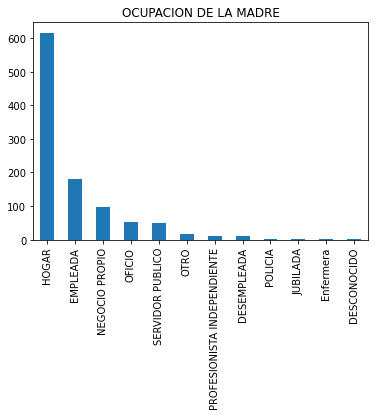

In [51]:
plot=habitos["Ocupacion_m"].value_counts().plot(kind="bar",title="OCUPACION DE LA MADRE")

In [52]:
habitos["Promedio_secundaria"].unique()

array(['7.4', '7.2', '7.9', '9.4', '8.8', '8.2', '6.1', '8.1', '9.5',
       '8.6', '9.1', '7.6', '9.3', '9', '8', '9.2', '8.3', '9.7', '8.7',
       '7.8', '9.6', '8.4', '7', '7.7', '8.9', '7.1', '8.5', '7.3', '7.5',
       '9.8', '6.9', '9.9', '6.5', '7,3', nan, '10', '6.8', '6.7', '6.6',
       'SIN CERTIFICADO', '806', '8,0', '´9.6'], dtype=object)

In [53]:
habitos["Promedio_secundaria"]=habitos["Promedio_secundaria"].replace(['806'],"8.6")
habitos["Promedio_secundaria"]=habitos["Promedio_secundaria"].replace(['7,3'],"7.3")
habitos["Promedio_secundaria"]=habitos["Promedio_secundaria"].replace(['8,0'],"8.0")
habitos["Promedio_secundaria"]=habitos["Promedio_secundaria"].replace(['´9.6'],"9.6")
habitos["Promedio_secundaria"]=habitos["Promedio_secundaria"].replace(['SIN CERTIFICADO'],"8.6")
habitos["Promedio_secundaria"]=habitos["Promedio_secundaria"].replace(["6.0", "6.1", "6.2", "6.3", "6.4", "6.5", "6.6", "6.7", "6.8", "6.9"],"6.0 - 6.9")
habitos["Promedio_secundaria"]=habitos["Promedio_secundaria"].replace(["7","7.0", "7.1", "7.2", "7.3", "7.4", "7.5", "7.6", "7.7", "7.8", "7.9"],"7.0 - 7.9")
habitos["Promedio_secundaria"]=habitos["Promedio_secundaria"].replace([8.6,"8", "8.0", "8.1", "8.2", "8.3", "8.4", "8.5", "8.6", "8.7", "8.8", "8.9"],"8.0 - 8.9")
habitos["Promedio_secundaria"]=habitos["Promedio_secundaria"].replace(["9","9.0", "9.1", "9.2", "9.3", "9.4", "9.5", "9.6", "9.7", "9.8", "9.9"],"9.0 - 9.9")

In [54]:
habitos["Promedio_secundaria"].unique()

array(['7.0 - 7.9', '9.0 - 9.9', '8.0 - 8.9', '6.0 - 6.9', nan, '10'],
      dtype=object)

In [55]:
freq_promedio = (habitos.groupby("Promedio_secundaria").agg(frecuency=("Promedio_secundaria", "count")).reset_index())
freq_promedio

,Promedio_secundaria,frecuency
0,10,1
1,6.0 - 6.9,12
2,7.0 - 7.9,185
3,8.0 - 8.9,356
4,9.0 - 9.9,336


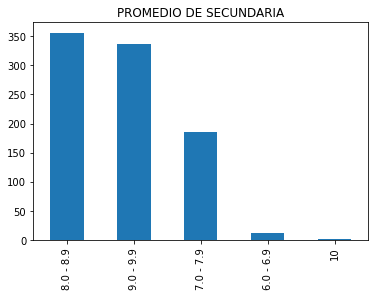

In [56]:
plot=habitos["Promedio_secundaria"].value_counts().plot(kind="bar",title="PROMEDIO DE SECUNDARIA")

In [57]:
habitos["Aciertos_comipems"].unique()

array(['71 A 90', '91 A 120', '92', '102', '80', '73', '78', '94', '89',
       '86', '90', '75', '87', '74', '88', '81', '96', '110', '76', '82',
       '85', '100', '116', '79', '91', '77', '108', '83', '99', '93',
       '106', '107', '112', '72', '97', '84', '104', '95', '98',
       '51 A 70', '6', '75 ACIERTOS', nan, '70', '71', '109', '101',
       '104 aciertos', '58', '65', '63', '105', '45', '9.2', '111', '68'],
      dtype=object)

In [58]:
habitos["Aciertos_comipems"]=habitos["Aciertos_comipems"].replace(['45'],"40 - 49")
habitos["Aciertos_comipems"]=habitos["Aciertos_comipems"].replace(['50', "51", "52", "53", "54", "55", "56", "57", "58", "59", "51 A 70"],"50 - 59")
habitos["Aciertos_comipems"]=habitos["Aciertos_comipems"].replace(['6','60', "61", "62", "63", "64", "65", "66", "67", "68", "69" ],"60 - 69")
habitos["Aciertos_comipems"]=habitos["Aciertos_comipems"].replace(['71 A 90','70', "71", "72", "73", "74", "75", "76", "77", "78", "79", '75 ACIERTOS' ],"70 - 79")
habitos["Aciertos_comipems"]=habitos["Aciertos_comipems"].replace(['8.6','80', "81", "82", "83", "84", "85", "86", "87", "88", "89" ],"80 - 89")
habitos["Aciertos_comipems"]=habitos["Aciertos_comipems"].replace(['91 A 120','9.2','90', "91", "92", "93", "94", "95", "96", "97", "98", "99" ],"90 - 99")
habitos["Aciertos_comipems"]=habitos["Aciertos_comipems"].replace(['104 aciertos','100', "101", "102", "103", "104", "105", "106", "107", "108", "109" ],"100 - 109")
habitos["Aciertos_comipems"]=habitos["Aciertos_comipems"].replace(['110', "111", "112", "113", "114", "115", "116", "117", "118", "119" ],"110 - 119")

In [59]:
habitos["Aciertos_comipems"].unique()

array(['70 - 79', '90 - 99', '100 - 109', '80 - 89', '110 - 119',
       '50 - 59', '60 - 69', nan, '40 - 49'], dtype=object)

In [60]:
freq_aciertos = (habitos.groupby("Aciertos_comipems").agg(frecuency=("Aciertos_comipems", "count")).reset_index())
freq_aciertos

,Aciertos_comipems,frecuency
0,100 - 109,28
1,110 - 119,6
2,40 - 49,1
3,50 - 59,31
4,60 - 69,4
5,70 - 79,462
6,80 - 89,178
7,90 - 99,179


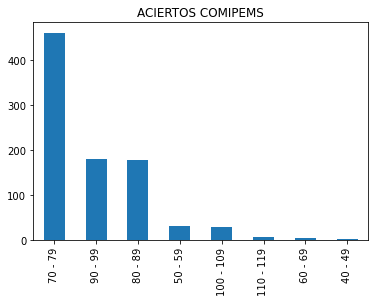

In [61]:
plot=habitos["Aciertos_comipems"].value_counts().plot(kind="bar",title="ACIERTOS COMIPEMS")

In [62]:
habitos["Opcion_comipems"].unique()

array(['SEGUNDA', 'PRIMERA', 'TERCERA', 'OTRA', 'CUARTA', 'QUINTA',
       'PRIMERA OPCION', 'LA PRIMERA', '5ta', 'LA PROMERA', '2', 'quinta',
       '3', 'SEGUNDA OPCION', '3°', '1', '2da', 'Primera',
       'EN LA PRIMERA', 'tercera', '1º', '1ra', '6',
       'EN LA PRIMERA OPCION', '1°', 'NO.1', 'primera', 'CBT NO 2 ',
       'PRIMERA OPCION ', 'en la primera', '4',
       'CBT NUM. 2 CARLOS PICHARDO DAC',
       'EN LA PRIMERA CBT.2 CARLOS PICHARDO ', '7', 'segunda', 'PRIMERA ',
       'En mi primera', '5', 'en la primera ', 'Primera opcion', '1RA',
       nan, 'EN LA QUINTA OPCION', '2a', '1er opcion', 'EN LA PRIMERA ',
       '4ª', '1ra OPCION', 'SÉPTIMA 7º', '1ra OPCION ', 'primera ', '8',
       'CBT 2 ', 'Primera ', '9', '4 opcion', 'SEGUNDA OPCIÓN ',
       'EN LA SEGUNDA', 'NO. 4', '1° opcion', 'En la primera',
       'primera opcion', 'Octava', '6 ta', 'en la segunda',
       'PRIMERA OPCIÓN  ', 'PRIMERA OPCIÓN', '2DA OPCION', 'sexta',
       'CBT2 TECAMAC', 'SEPTIMA', 'Sex

In [63]:
habitos["Opcion_comipems"]=habitos["Opcion_comipems"].replace(['1', '1º','1°', 'NO.1','primera', 'Primera', 'LA PROMERA',
                                                              '1er opcion', '1er opcion', '1ra OPCION ', '1° opcion', 'Primera opcion',
                                                              '1ra OPCION ', 'PRIMERA OPCION', 'LA PRIMERA', '1ra', 'EN LA PRIMERA OPCION',
                                                              'PRIMERA OPCION ','en la primera', 'EN LA PRIMERA', 'EN LA PRIMERA CBT.2 CARLOS PICHARDO ',
                                                              'CBT NUM. 2 CARLOS PICHARDO DAC', 'CBT NO 2 ', '1RA', 'PRIMERA ', 'En mi primera',
                                                              'EN LA PRIMERA ', 'en la primera ', '1ra OPCION', 'CBT 2 ', 'En la primera', 'primera ',
                                                              'Primera ', 'PRIMERA OPCIÓN  ', 'PRIMERA OPCIÓN', 'CBT2 TECAMAC', 'primera opcion'],"PRIMERA")

habitos["Opcion_comipems"]=habitos["Opcion_comipems"].replace(['2','en la segunda', 'SEGUNDA OPCION', '2da', '2a', 'SEGUNDA OPCIÓN ', 'segunda', 'EN LA SEGUNDA', '2DA OPCION'],"SEGUNDA")
habitos["Opcion_comipems"]=habitos["Opcion_comipems"].replace(['3', '3°', 'tercera'],"TERCERA")
habitos["Opcion_comipems"]=habitos["Opcion_comipems"].replace([ '4', '4ª', '4 opcion', 'NO. 4'],"CUARTA")
habitos["Opcion_comipems"]=habitos["Opcion_comipems"].replace(['5ta', 'quinta', '5', 'EN LA QUINTA OPCION', 'QUINTA'],"QUINTA")
habitos["Opcion_comipems"]=habitos["Opcion_comipems"].replace(['6', '7', 'SÉPTIMA 7º', '8', '9', 'Octava','6 ta','Sexta ', 'SEXTA', 'sexta','SEPTIMA', 'Sexta', '17', '10', '13', '12', 'CAMBIO DE PLANTEL ',
       'NOVENA ', 'cambio de escuela ', '11' ],"OTRA")

In [64]:
habitos["Opcion_comipems"].unique()

array(['SEGUNDA', 'PRIMERA', 'TERCERA', 'OTRA', 'CUARTA', 'QUINTA', nan],
      dtype=object)

In [65]:
freq_opcion = (habitos.groupby("Opcion_comipems").agg(frecuency=("Opcion_comipems", "count")).reset_index())
freq_opcion

,Opcion_comipems,frecuency
0,CUARTA,28
1,OTRA,39
2,PRIMERA,632
3,QUINTA,26
4,SEGUNDA,114
5,TERCERA,46


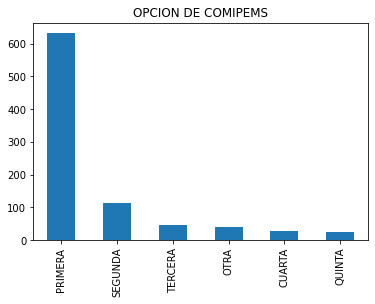

In [66]:
plot=habitos["Opcion_comipems"].value_counts().plot(kind="bar",title="OPCION DE COMIPEMS")

In [67]:
habitos["Equipo_de_computo"].unique()

array(['EQUIPO DE COMPUTO, IMPRESORA E INTERNET', 'SOLO INTERNET',
       'EQUIPO DE COMPUTO E INTERNET', 'EQUIPO DE COMPUTO', 'NINGUNA',
       'EQUIPO DE COMPUTO, IMPRESORA',
       'EQUIPO DE COMPUTO, IMPRESORA, INTERNET', 'IMPRESORA', 'INTERNET',
       'EQUIPO DE COMPUTO, INTERNET', 'EQUIPO DE COMPUTO E IMPRESORA',
       nan, 'IMPRESORA, INTERNET'], dtype=object)

In [68]:
habitos["Equipo_de_computo"]=habitos["Equipo_de_computo"].replace(["EQUIPO DE COMPUTO E INTERNET"],"EQUIPO DE COMPUTO, INTERNET")
habitos["Equipo_de_computo"]=habitos["Equipo_de_computo"].replace(["EQUIPO DE COMPUTO E IMPRESORA"],"EQUIPO DE COMPUTO, IMPRESORA")
habitos["Equipo_de_computo"]=habitos["Equipo_de_computo"].replace(["EQUIPO DE COMPUTO, IMPRESORA E INTERNET"],"EQUIPO DE COMPUTO, IMPRESORA, INTERNET")
habitos["Equipo_de_computo"]=habitos["Equipo_de_computo"].replace(["SOLO INTERNET"],"INTERNET")

In [69]:
habitos["Equipo_de_computo"].unique()

array(['EQUIPO DE COMPUTO, IMPRESORA, INTERNET', 'INTERNET',
       'EQUIPO DE COMPUTO, INTERNET', 'EQUIPO DE COMPUTO', 'NINGUNA',
       'EQUIPO DE COMPUTO, IMPRESORA', 'IMPRESORA', nan,
       'IMPRESORA, INTERNET'], dtype=object)

In [70]:
freq_computo = (habitos.groupby("Equipo_de_computo").agg(frecuency=("Equipo_de_computo", "count")).reset_index())
freq_computo

,Equipo_de_computo,frecuency
0,EQUIPO DE COMPUTO,141
1,"EQUIPO DE COMPUTO, IMPRESORA",23
2,"EQUIPO DE COMPUTO, IMPRESORA, INTERNET",210
3,"EQUIPO DE COMPUTO, INTERNET",195
4,IMPRESORA,8
5,"IMPRESORA, INTERNET",1
6,INTERNET,209
7,NINGUNA,103


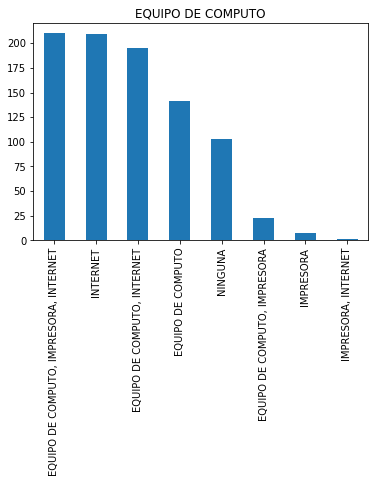

In [71]:
plot=habitos["Equipo_de_computo"].value_counts().plot(kind="bar",title="EQUIPO DE COMPUTO")

In [72]:
habitos["Honey_alonso"].unique()

array(['ESTILO PRAGMATICO', 'ESTILO REFLEXIVO', 'ESTILO ACTIVO',
       'ESTILO TEORICO', 'REFLEXIVO', 'ACTIVO', 'ACTIVO, REFLEXIVO',
       'PRAGMATICO', 'TEORICO', 'REFLEXIVO, TEORICO',
       'REFLEXIVO, PRAGMATICO', 'TEORICO, PRAGMATICO',
       'ACTIVO, PRAGMATICO', 'REFLEXIVO, TEORICO, PRAGMATICO',
       'ACTIVO, REFLEXIVO, TEORICO, PRAGMATICO',
       'ACTIVO, REFLEXIVO, PRAGMATICO', 'ACTIVO, TEORICO', nan],
      dtype=object)

In [73]:
habitos["Honey_alonso"]=habitos["Honey_alonso"].replace(['ACTIVO, TEORICO','ACTIVO', 'TEORICO',"ESTILO ACTIVO", 'ACTIVO, REFLEXIVO','ACTIVO, REFLEXIVO, PRAGMATICO', 'ACTIVO, PRAGMATICO', 'ACTIVO, REFLEXIVO, TEORICO, PRAGMATICO'],"ACTIVO")
habitos["Honey_alonso"]=habitos["Honey_alonso"].replace(["ESTILO PRAGMATICO"],"PRAGMATICO")
habitos["Honey_alonso"]=habitos["Honey_alonso"].replace(["ESTILO REFLEXIVO", 'REFLEXIVO, TEORICO', 'REFLEXIVO, TEORICO, PRAGMATICO', 'REFLEXIVO, PRAGMATICO'],"REFLEXIVO")
habitos["Honey_alonso"]=habitos["Honey_alonso"].replace(["ESTILO TEORICO", 'TEORICO, PRAGMATICO'],"TEORICO")

In [74]:
habitos["Honey_alonso"].unique()

array(['PRAGMATICO', 'REFLEXIVO', 'ACTIVO', 'TEORICO', nan], dtype=object)

In [75]:
freq_honey = (habitos.groupby("Honey_alonso").agg(frecuency=("Honey_alonso", "count")).reset_index())
freq_honey

,Honey_alonso,frecuency
0,ACTIVO,272
1,PRAGMATICO,109
2,REFLEXIVO,189
3,TEORICO,88


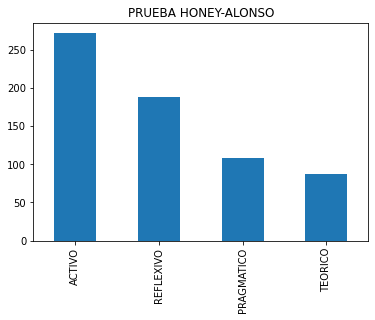

In [76]:
plot=habitos["Honey_alonso"].value_counts().plot(kind="bar",title="PRUEBA HONEY-ALONSO")

In [77]:
habitos["Canal_aprendizaje"].unique()

array([nan, 'AUDITIVO', 'VISUAL', 'KINESTESICO', 'VISUAL, KINESTESICO',
       'VISUAL, AUDITIVO, KINESTESICO', 'AUDITIVO, KINESTESICO',
       'VISUAL, AUDITIVO', 'KINESTÉSICO', 'VISUAL, KINESTÉSICO',
       'AUDITIVO, KINESTÉSICO'], dtype=object)

In [78]:
habitos["Canal_aprendizaje"]=habitos["Canal_aprendizaje"].replace(["AUDITIVO, KINESTÉSICO"],"AUDITIVO, KINESTESICO")
habitos["Canal_aprendizaje"]=habitos["Canal_aprendizaje"].replace(["KINESTÉSICO"],"KINESTESICO")
habitos["Canal_aprendizaje"]=habitos["Canal_aprendizaje"].replace(["VISUAL, KINESTÉSICO	"],"VISUAL, KINESTESICO")

In [79]:
habitos["Canal_aprendizaje"].unique()

array([nan, 'AUDITIVO', 'VISUAL', 'KINESTESICO', 'VISUAL, KINESTESICO',
       'VISUAL, AUDITIVO, KINESTESICO', 'AUDITIVO, KINESTESICO',
       'VISUAL, AUDITIVO', 'VISUAL, KINESTÉSICO'], dtype=object)

In [80]:
habitos["Canal_aprendizaje"]=habitos["Canal_aprendizaje"].replace(["AUDITIVO, KINESTESICO"],"AUDITIVO")
habitos["Canal_aprendizaje"]=habitos["Canal_aprendizaje"].replace(['VISUAL, KINESTESICO', 'VISUAL, AUDITIVO','VISUAL, KINESTÉSICO','VISUAL, AUDITIVO, KINESTESICO', 'VISUAL, AUDITIVO, KINESTESICO'],"VISUAL")


In [81]:
habitos["Canal_aprendizaje"].unique()


array([nan, 'AUDITIVO', 'VISUAL', 'KINESTESICO'], dtype=object)

In [82]:
freq_canal = (habitos.groupby("Canal_aprendizaje").agg(frecuency=("Canal_aprendizaje", "count")).reset_index())
freq_canal


,Canal_aprendizaje,frecuency
0,AUDITIVO,179
1,KINESTESICO,147
2,VISUAL,263


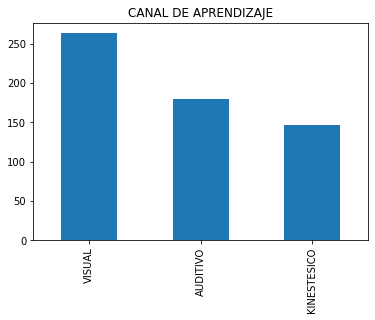

In [83]:
plot=habitos["Canal_aprendizaje"].value_counts().plot(kind="bar",title="CANAL DE APRENDIZAJE")

In [84]:
habitos["Funcionamiento_familiar"].unique()

array(['FUNCIONAL', 'DISFUNCIONAL', 'MODERADAMENTE FUNCIONAL',
       'SEVERMENTE DISFUNCIONAL', nan, 'FAMILIA FUNCIONAL',
       'FAMILIA DISFUNCIONAL', 'FAMILIA MODERADAMENTE FUNCIONAL',
       'FAMILIA SEVERAMENTE DISFUNCIONAL'], dtype=object)

In [85]:
habitos["Funcionamiento_familiar"]=habitos["Funcionamiento_familiar"].replace(["FAMILIA FUNCIONAL"],"FUNCIONAL")
habitos["Funcionamiento_familiar"]=habitos["Funcionamiento_familiar"].replace(["FAMILIA DISFUNCIONAL"],"DISFUNCIONAL")
habitos["Funcionamiento_familiar"]=habitos["Funcionamiento_familiar"].replace(["FAMILIA MODERADAMENTE FUNCIONAL"],"MODERADAMENTE FUNCIONAL")
habitos["Funcionamiento_familiar"]=habitos["Funcionamiento_familiar"].replace(["FAMILIA SEVERAMENTE DISFUNCIONAL", "SEVERMENTE DISFUNCIONAL"],"SEVERAMENTE DISFUNCIONAL")


In [86]:
habitos["Funcionamiento_familiar"].unique()

array(['FUNCIONAL', 'DISFUNCIONAL', 'MODERADAMENTE FUNCIONAL',
       'SEVERAMENTE DISFUNCIONAL', nan], dtype=object)

In [87]:
freq_familia = (habitos.groupby("Funcionamiento_familiar").agg(frecuency=("Funcionamiento_familiar", "count")).reset_index())
freq_familia

,Funcionamiento_familiar,frecuency
0,DISFUNCIONAL,47
1,FUNCIONAL,179
2,MODERADAMENTE FUNCIONAL,204
3,SEVERAMENTE DISFUNCIONAL,4


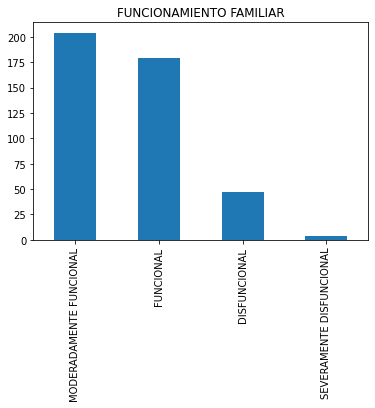

In [88]:
plot=habitos["Funcionamiento_familiar"].value_counts().plot(kind="bar",title="FUNCIONAMIENTO FAMILIAR")

In [89]:
habitos["Autoestima"].unique()

array([nan, 'ALTA', 'MEDIA', 'BAJA', 'AUTOESTIMA MEDIA',
       'BUENA AUTOESTIMA'], dtype=object)

In [90]:
habitos["Autoestima"]=habitos["Autoestima"].replace(["AUTOESTIMA MEDIA"],"MEDIA")
habitos["Autoestima"]=habitos["Autoestima"].replace(["BUENA AUTOESTIMA"],"ALTA")

In [91]:
freq_autoestima = (habitos.groupby("Autoestima").agg(frecuency=("Autoestima", "count")).reset_index())
freq_autoestima

,Autoestima,frecuency
0,ALTA,309
1,BAJA,9
2,MEDIA,203


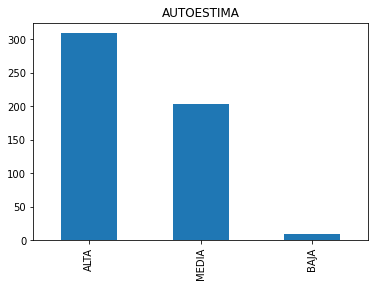

In [92]:
plot=habitos["Autoestima"].value_counts().plot(kind="bar",title="AUTOESTIMA")

In [93]:
habitos["Habitos_de_estudio"].unique()

array([nan, 'DISTRACTORES DURANTE EL ESTUDIO',
       'ACTITUDES Y CONDUCTAS PRODUCTIVAS ANTE EL ESTUDIO',
       'DISTRIBUCIÓN DE TIEMPO', 'OPTIMIZACIÓN DE LA LECTURA',
       'CÓMO PREPARAR UN EXAMEN', 'CÓMO TOMAR NOTAS EN CLASE',
       'MOTIVACIÓN PARA EL ESTUDIO', 'DISTRACTORES DURTANTE EL ESTUDIO',
       'DISTRIBUCIÓN DEL TIEMPO',
       'DISTRACTORES DURANTE EL ESTUDIO ANTE EL ESTUDIO',
       'MOTIVACIÓN PARA EL ESTUDIO Y CONDUCTAS PRODUCTIVAS ANTE EL ESTUDIO',
       'DISTRIBUCIÓN DEL TIEMPO ESTUDIO', 'DISTRIBUCIÓN DEL TIEMPO '],
      dtype=object)

In [94]:
habitos["Habitos_de_estudio"]=habitos["Habitos_de_estudio"].replace(["DISTRACTORES DURANTE EL ESTUDIO ANTE EL ESTUDIO"],"DISTRACTORES DURANTE EL ESTUDIO")

habitos["Habitos_de_estudio"]=habitos["Habitos_de_estudio"].replace(['MOTIVACIÓN PARA EL ESTUDIO Y CONDUCTAS PRODUCTIVAS ANTE EL ESTUDIO', "ACTITUDES Y CONDUCTAS PRODUCTIVAS ANTE EL ESTUDIO"],'CONDUCTAS PRODUCTIVAS ANTE EL ESTUDIO')

habitos["Habitos_de_estudio"]=habitos["Habitos_de_estudio"].replace(["DISTRIBUCIÓN DEL TIEMPO ESTUDIO", "DISTRIBUCIÓN DEL TIEMPO", "DISTRIBUCIÓN DEL TIEMPO", 'DISTRIBUCIÓN DEL TIEMPO '],"DISTRIBUCION DEL TIEMPO")

In [95]:
habitos["Habitos_de_estudio"].unique()

array([nan, 'DISTRACTORES DURANTE EL ESTUDIO',
       'CONDUCTAS PRODUCTIVAS ANTE EL ESTUDIO', 'DISTRIBUCIÓN DE TIEMPO',
       'OPTIMIZACIÓN DE LA LECTURA', 'CÓMO PREPARAR UN EXAMEN',
       'CÓMO TOMAR NOTAS EN CLASE', 'MOTIVACIÓN PARA EL ESTUDIO',
       'DISTRACTORES DURTANTE EL ESTUDIO', 'DISTRIBUCION DEL TIEMPO'],
      dtype=object)

In [96]:
freq_habitos = (habitos.groupby("Habitos_de_estudio").agg(frecuency=("Habitos_de_estudio", "count")).reset_index())
freq_habitos

,Habitos_de_estudio,frecuency
0,CONDUCTAS PRODUCTIVAS ANTE EL ESTUDIO,10
1,CÓMO PREPARAR UN EXAMEN,12
2,CÓMO TOMAR NOTAS EN CLASE,11
3,DISTRACTORES DURANTE EL ESTUDIO,64
4,DISTRACTORES DURTANTE EL ESTUDIO,16
5,DISTRIBUCION DEL TIEMPO,143
6,DISTRIBUCIÓN DE TIEMPO,49
7,MOTIVACIÓN PARA EL ESTUDIO,19
8,OPTIMIZACIÓN DE LA LECTURA,33


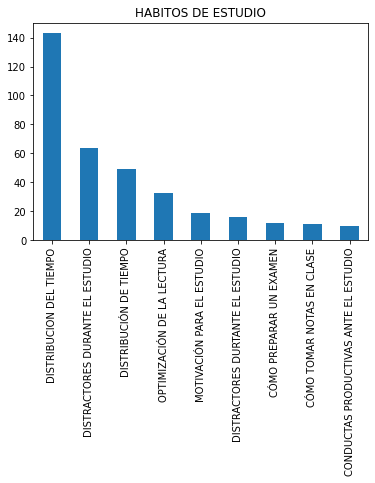

In [97]:
plot=habitos["Habitos_de_estudio"].value_counts().plot(kind="bar",title="HABITOS DE ESTUDIO")

In [98]:
habitos_1=pd.get_dummies(habitos,columns=["Grupo", "Edad", "Promedio_secundaria","Carrera","Genero", "Municipio", "Grado_estudios_p", "Ocupacion_p", "Grado_estudios_m",
                                "Ocupacion_m","Ingreso_mensual", "Aciertos_comipems", "Opcion_comipems", "Equipo_de_computo",
                                 "Honey_alonso", "Canal_aprendizaje", "Funcionamiento_familiar", 
                                 "Autoestima"])

In [99]:
habitos_1.head(5)

,Habitos_de_estudio,Grupo_105,Grupo_106,Grupo_107,Grupo_108,Grupo_109,Grupo_110,Grupo_111,Grupo_112,Grupo_113,...,Canal_aprendizaje_AUDITIVO,Canal_aprendizaje_KINESTESICO,Canal_aprendizaje_VISUAL,Funcionamiento_familiar_DISFUNCIONAL,Funcionamiento_familiar_FUNCIONAL,Funcionamiento_familiar_MODERADAMENTE FUNCIONAL,Funcionamiento_familiar_SEVERAMENTE DISFUNCIONAL,Autoestima_ALTA,Autoestima_BAJA,Autoestima_MEDIA
0,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [100]:
habitos_1["Habitos_de_estudio"]=habitos_1.astype(str)

In [101]:
habitos_1.Habitos_de_estudio.unique()

array(['nan', 'DISTRACTORES DURANTE EL ESTUDIO',
       'CONDUCTAS PRODUCTIVAS ANTE EL ESTUDIO', 'DISTRIBUCIÓN DE TIEMPO',
       'OPTIMIZACIÓN DE LA LECTURA', 'CÓMO PREPARAR UN EXAMEN',
       'CÓMO TOMAR NOTAS EN CLASE', 'MOTIVACIÓN PARA EL ESTUDIO',
       'DISTRACTORES DURTANTE EL ESTUDIO', 'DISTRIBUCION DEL TIEMPO'],
      dtype=object)

In [102]:
encoder = LabelEncoder()

In [103]:
habitos_1["Habitos_de_estudio"] = encoder.fit_transform(habitos_1["Habitos_de_estudio"])

In [104]:
habitos_1.head()

,Habitos_de_estudio,Grupo_105,Grupo_106,Grupo_107,Grupo_108,Grupo_109,Grupo_110,Grupo_111,Grupo_112,Grupo_113,...,Canal_aprendizaje_AUDITIVO,Canal_aprendizaje_KINESTESICO,Canal_aprendizaje_VISUAL,Funcionamiento_familiar_DISFUNCIONAL,Funcionamiento_familiar_FUNCIONAL,Funcionamiento_familiar_MODERADAMENTE FUNCIONAL,Funcionamiento_familiar_SEVERAMENTE DISFUNCIONAL,Autoestima_ALTA,Autoestima_BAJA,Autoestima_MEDIA
0,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,9,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,9,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [105]:
habitos_1.Habitos_de_estudio.unique()

array([9, 3, 0, 6, 8, 1, 2, 7, 4, 5])

In [106]:
freq_habitos = (habitos_1.groupby("Habitos_de_estudio").agg(frecuency=("Habitos_de_estudio", "count")).reset_index())
freq_habitos

,Habitos_de_estudio,frecuency
0,0,10
1,1,12
2,2,11
3,3,64
4,4,16
5,5,143
6,6,49
7,7,19
8,8,33
9,9,681


array([[<AxesSubplot:title={'center':'Habitos_de_estudio'}>]],
      dtype=object)

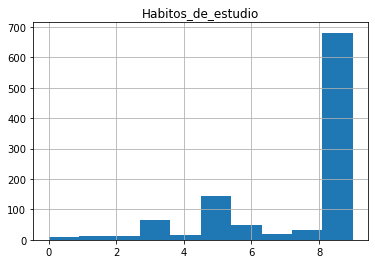

In [107]:
habitos_1.hist("Habitos_de_estudio")

In [108]:
habitos_2=habitos_1.drop(habitos_1[habitos_1['Habitos_de_estudio'] <=3 ].index)
habitos_3=habitos_2.drop(habitos_2[habitos_2['Habitos_de_estudio'] ==4].index)
habitos_4=habitos_3.drop(habitos_3[habitos_3['Habitos_de_estudio'] ==7].index)
habitos_5=habitos_4.drop(habitos_4[habitos_4['Habitos_de_estudio'] ==8].index)

In [109]:
habitos_5.Habitos_de_estudio.unique()

array([9, 6, 5])

In [110]:
freq_habitos = (habitos_5.groupby("Habitos_de_estudio").agg(frecuency=("Habitos_de_estudio", "count")).reset_index())
freq_habitos

,Habitos_de_estudio,frecuency
0,5,143
1,6,49
2,9,681


array([[<AxesSubplot:title={'center':'Habitos_de_estudio'}>]],
      dtype=object)

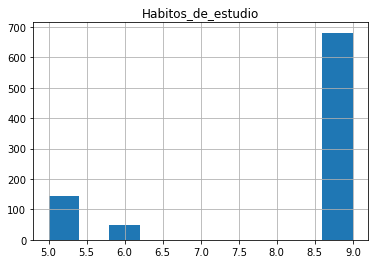

In [111]:
habitos_5.hist("Habitos_de_estudio")

In [112]:
encoder.classes_

array(['CONDUCTAS PRODUCTIVAS ANTE EL ESTUDIO', 'CÓMO PREPARAR UN EXAMEN',
       'CÓMO TOMAR NOTAS EN CLASE', 'DISTRACTORES DURANTE EL ESTUDIO',
       'DISTRACTORES DURTANTE EL ESTUDIO', 'DISTRIBUCION DEL TIEMPO',
       'DISTRIBUCIÓN DE TIEMPO', 'MOTIVACIÓN PARA EL ESTUDIO',
       'OPTIMIZACIÓN DE LA LECTURA', 'nan'], dtype=object)

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# tamaño de la figura en pulgadas
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)


In [114]:
X = habitos_5.drop("Habitos_de_estudio", axis=1)
y = habitos_5["Habitos_de_estudio"]

In [115]:
# estandarizar el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [116]:
X_train, X_test_dev, y_train, y_test_dev = train_test_split(X, y, test_size=0.2)

In [117]:
X_test, X_dev, y_test, y_dev = train_test_split(X, y, test_size=0.5)

In [118]:
# crear el clasificador
classifier1 = RandomForestClassifier(n_estimators=50)
classifier2= RandomForestClassifier(n_estimators=100)
classifier3= RandomForestClassifier(n_estimators=150)

In [119]:
# Entrenar el modelo usando el conjunto de entranamiento
classifier1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [120]:
classifier2.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
classifier3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [122]:
# predicción en el conjunto de prueba
y_pred1 = classifier1.predict(X_test_dev)
y_pred2 = classifier2.predict(X_test_dev)
y_pred3 = classifier3.predict(X_test_dev)
#y_pred = classifier.predict(X_test)

In [123]:
#print("Precisión:", accuracy_score(y_test, y_pred))
print("Precisión:", accuracy_score(y_test_dev, y_pred1))
print("Precisión:", accuracy_score(y_test_dev, y_pred2))
print("Precisión:", accuracy_score(y_test_dev, y_pred3))

Precisión: 0.9542857142857143
Precisión: 0.9714285714285714
Precisión: 0.9657142857142857


<AxesSubplot:>

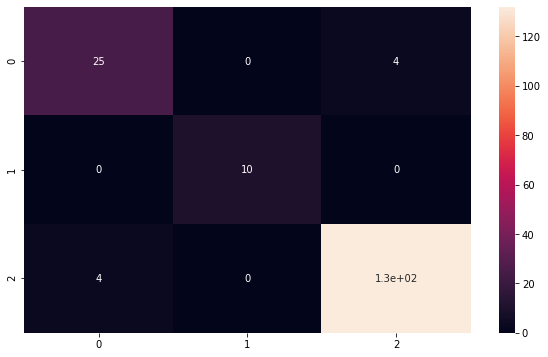

In [124]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test_dev,y_pred1),annot= True)

<AxesSubplot:>

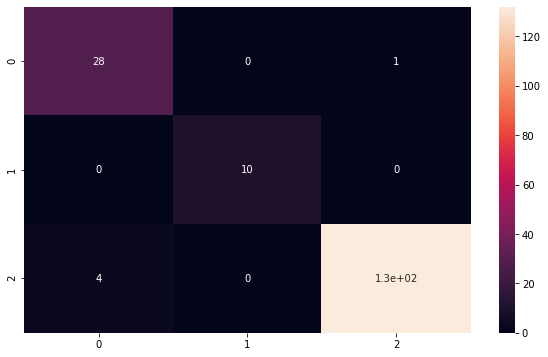

In [125]:
sns.heatmap(confusion_matrix(y_test_dev,y_pred2),annot= True)

<AxesSubplot:>

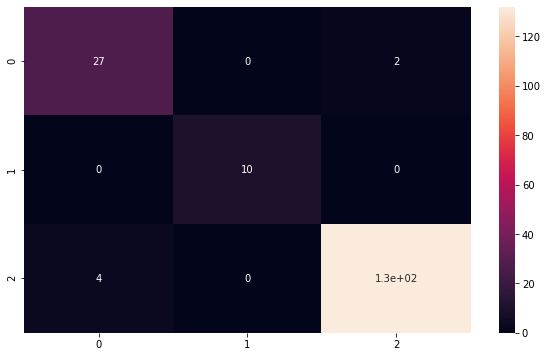

In [126]:
sns.heatmap(confusion_matrix(y_test_dev,y_pred3),annot= True)

In [127]:
print(classification_report(y_test_dev, y_pred1))

              precision    recall  f1-score   support

           5       0.86      0.86      0.86        29
           6       1.00      1.00      1.00        10
           9       0.97      0.97      0.97       136

    accuracy                           0.95       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.95      0.95      0.95       175



In [128]:
print(classification_report(y_test_dev, y_pred2))

              precision    recall  f1-score   support

           5       0.88      0.97      0.92        29
           6       1.00      1.00      1.00        10
           9       0.99      0.97      0.98       136

    accuracy                           0.97       175
   macro avg       0.96      0.98      0.97       175
weighted avg       0.97      0.97      0.97       175



In [129]:
print(classification_report(y_test_dev, y_pred3))

              precision    recall  f1-score   support

           5       0.87      0.93      0.90        29
           6       1.00      1.00      1.00        10
           9       0.99      0.97      0.98       136

    accuracy                           0.97       175
   macro avg       0.95      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175



In [130]:
from sklearn.svm import SVC
#Crear un objeto Support Vector Machine
svm= SVC()

In [131]:
#Fit the model to the train set
svm.fit(X_train, y_train)

SVC()

In [132]:
y_pred= svm.predict(X_test_dev)

In [133]:
print(y_pred)

[5 9 9 5 6 9 5 9 9 5 9 9 6 9 9 9 9 6 9 9 9 9 9 9 9 9 9 9 9 9 5 9 9 5 5 9 9
 9 9 5 9 9 5 9 9 9 9 9 9 9 5 5 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 5 9 9 9
 9 9 9 9 9 9 9 9 6 9 5 9 9 5 6 9 9 9 9 9 9 9 9 5 9 9 5 5 9 9 9 5 5 9 9 5 6
 9 5 9 5 9 9 9 9 9 9 5 9 5 9 9 9 5 6 6 9 9 9 9 9 5 9 9 5 9 9 6 9 9 9 9 9 9
 9 9 5 9 5 5 5 6 9 9 9 9 9 9 9 9 5 9 9 5 9 9 9 9 9 5 9]


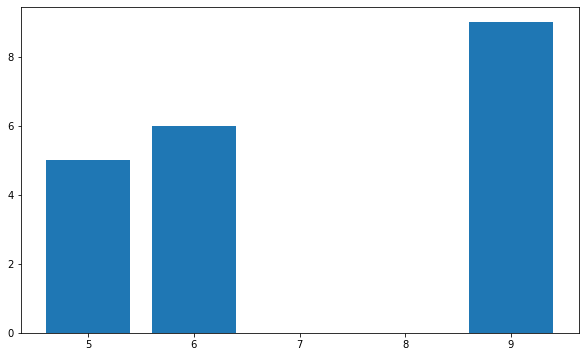

In [134]:
plt.bar(y_test_dev, y_test_dev)
#plt.plot (X_test, y_pred, color ='red', linewifth=3)
plt.show()

In [135]:
print("Datos del modelo support vector machine")
print()
print("Precisión:", accuracy_score(y_test_dev, y_pred))

Datos del modelo support vector machine

Precisión: 0.9714285714285714


<AxesSubplot:>

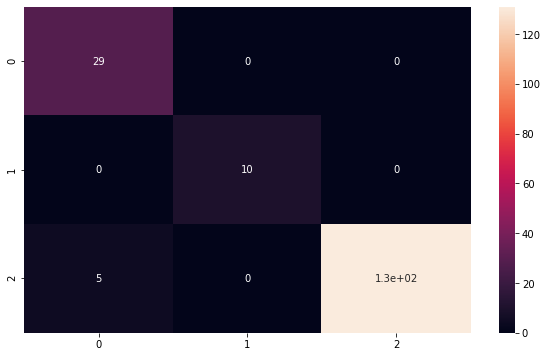

In [136]:
sns.heatmap(confusion_matrix(y_test_dev,y_pred),annot= True)

In [137]:
print(classification_report(y_test_dev, y_pred))

              precision    recall  f1-score   support

           5       0.85      1.00      0.92        29
           6       1.00      1.00      1.00        10
           9       1.00      0.96      0.98       136

    accuracy                           0.97       175
   macro avg       0.95      0.99      0.97       175
weighted avg       0.98      0.97      0.97       175

